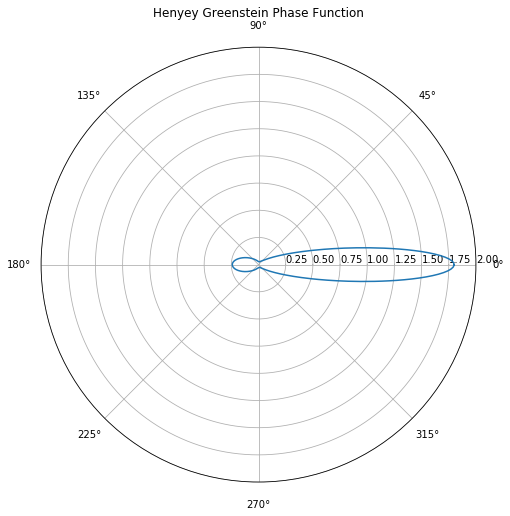

<function __main__.plt_two_slope_phase_func>

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

def phase_hg(r, g):
    return (1 - g * g) / (4 * np.pi) / pow((1 + g * g - 2 * g * np.cos(r)), 3.0 / 2.0)

def plt_phase_func(g):
    r = np.arange(0, 2*np.pi, 0.01)
    theta = phase_hg(r, g)

    ax = plt.subplot(111, projection='polar')
    ax.plot(r, theta)
    ax.set_rmax(2)
    #ax.set_rticks([0.5, 1, 1.5, 2])  # less radial ticks
    ax.set_rlabel_position(0)  # get radial labels away from plotted line
    ax.grid(True)

    ax.set_title("Henyey Greenstein Phase Function", va='bottom')
    plt.show()

def lerp_func(a, b, lerp):
    return a + (b - a) * lerp
    
def plt_two_slope_phase_func(g0, g1, lerp):
    r = np.arange(0, 2*np.pi, 0.01)
    theta = lerp_func(phase_hg(r, g0), phase_hg(r, g1), lerp)
    
    plt.figure(figsize=[8,8])
    ax = plt.subplot(111, projection='polar')
    ax.plot(r, theta)
    ax.set_rmax(2)
    #ax.set_rticks([0.5, 1, 1.5, 2])  # less radial ticks
    ax.set_rlabel_position(0)  # get radial labels away from plotted line
    ax.grid(True)

    ax.set_title("Henyey Greenstein Phase Function", va='bottom')
    plt.show()

g0 = widgets.FloatSlider(min=-0.999,max=0.999,step=0.01,value=0.8)
g1 = widgets.FloatSlider(min=-0.999,max=0.999,step=0.01,value=-0.5)
lerp = widgets.FloatSlider(min=0,max=1,step=0.01,value=0.5)
widgets.interact(plt_two_slope_phase_func, g0=g0, g1=g1, lerp=lerp)



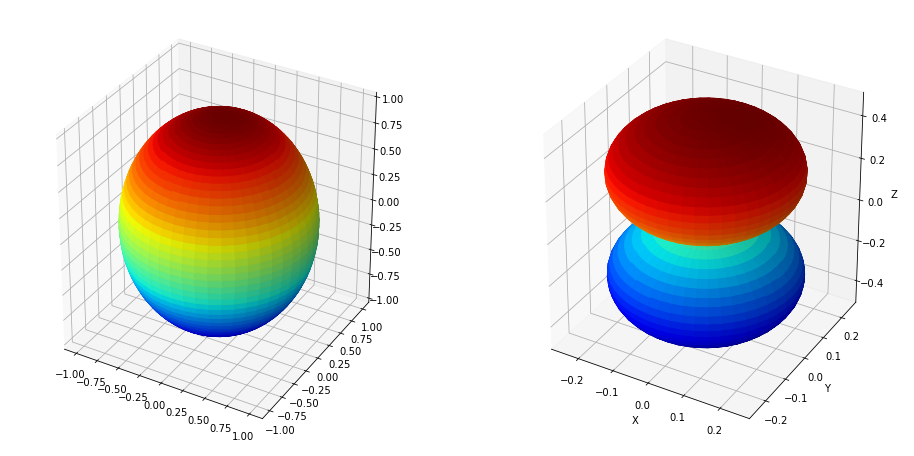

In [41]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from matplotlib import cm, colors
import numpy as np
from scipy.special import sph_harm

# Set the aspect ratio to 1 so our sphere looks spherical
fig = plt.figure(figsize=[16, 8])



# convention of scipy: theta is the azimuthal angle and phi is the polar angle
phi = np.linspace(0, np.pi, num=50)
theta = np.linspace(0, 2*np.pi, num=50)
phi, theta = np.meshgrid(phi, theta)

x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

m, l = 0, 1
sh = sph_harm(m, l, theta, phi).real
absSh = np.abs(sh)
sh_min, sh_max = sh.min(), sh.max()
sh_max += 0.000001
gradient = (sh - sh_min) / (sh_max - sh_min)

#===============
# set up the axes for the first plot
ax = fig.add_subplot(121, projection='3d')
surf = ax.plot_surface(x, y, z, facecolors=cm.jet(gradient))

ax = fig.add_subplot(122, projection='3d')
surf = ax.plot_surface(x*absSh, y*absSh, z*absSh, facecolors=cm.jet(gradient))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()